### 1) About the Dataset
This dataset provides comprehensive information about rental house prices across various locations in India. It includes details such as house type, size, location, city, latitude, longitude, price, currency, number of bathrooms, number of balconies, negotiability of price, price per square foot, verification date, description of the property, security deposit, and status of furnishing (furnished, unfurnished, semi-furnished).

Note: This is Recently scraped data of April 2024.

We Having 3 Big Cities Dataset 
* 1) Delhi 
* 2) Mumbai
* 3) Pune

We'll Train we our model for all the big cities

#### About the Columns
* 1) **House Type:** Type of house (e.g., apartment, villa, duplex).
* 2) **House Size:** Size of the house in square feet or square meters.
* 3) **Location:** Specific area or neighborhood where the property is located.
* 4) **City:** City in India where the property is situated.
* 5) **Latitude:** Geographic latitude coordinates of the property location.
* 6) **Longitude:** Geographic longitude coordinates of the property location.
* 7) **Price:** Rental price of the house.
* 8) **Currency:** Currency in which the price is denoted (e.g., INR - Indian Rupees).
* 9) **Number of Bathrooms:** Total number of bathrooms in the house.
* 10) **Number of Balconies:** Total number of balconies in the house.
* 11) **Negotiability:** Indicates whether the price is negotiable (Yes/No).
* 12) **Price per Square Foot:** Price of the house per square foot.
* 13) **Verification Date:** Date when the rental information was verified.
* 14) **Description:** Additional description or details about the property.
* 15) **Security Deposit:** Amount of security deposit required for renting the property.
* 16) **Status:** Indicates the furnishing status of the property (furnished, unfurnished, semi-furnished).

**Note:-**

The Data has Been Scrap by using BeautifulSoupe/ Web Scraping.

This Dataset is created from https://www.makaan.com/. If you want to learn more, you can visit the Website.

### 2) Importing the Standard Libraries

In [1461]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as sts
import warnings
warnings.filterwarnings('ignore')

### 3) Loading the Dataset

In [1462]:
df1 = pd.read_csv('Dataset/Indian_housing_Delhi_data.csv')
df2 = pd.read_csv('Dataset/Indian_housing_Mumbai_data.csv')
df3 = pd.read_csv('Dataset/Indian_housing_Pune_data.csv')

In [1463]:
df = pd.concat([df1,df2,df3]).reset_index(drop = True)

In [1464]:
df.head(5)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


#### 4) Let's analize some information about the dataset

In [1465]:
df.shape

(13910, 16)

**Observation:-** We having 13910 records avalible in our DataFrame

In [1466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910 entries, 0 to 13909
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        13910 non-null  object 
 1   house_size        13910 non-null  object 
 2   location          13910 non-null  object 
 3   city              13910 non-null  object 
 4   latitude          13910 non-null  float64
 5   longitude         13910 non-null  float64
 6   price             13910 non-null  int64  
 7   currency          13910 non-null  object 
 8   numBathrooms      13854 non-null  float64
 9   numBalconies      5291 non-null   float64
 10  isNegotiable      1276 non-null   object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  13910 non-null  object 
 13  description       13079 non-null  object 
 14  SecurityDeposit   13910 non-null  object 
 15  Status            13910 non-null  object 
dtypes: float64(5), int64(1), object(10)
memo

#### We have Seen that many of the data type is in the form of object so we'll try to convert that data into int or float so that my ml model can understand the model let go with column by columns

### EDA

###### Let's Analysis Column 1-by-1

###### House Type

In [1467]:
df['house_type'].unique()

array(['1 RK Studio Apartment ', '2 BHK Independent Floor ',
       '3 BHK Independent House ', '2 BHK Apartment ', '3 BHK Apartment ',
       '3 BHK Independent Floor ', '4 BHK Independent Floor ',
       '1 BHK Independent Floor ', '1 BHK Apartment ',
       '8 BHK Independent Floor ', '4 BHK Apartment ',
       '6 BHK Independent Floor ', '2 BHK Independent House ',
       '1 BHK Independent House ', '5 BHK Independent Floor ',
       '4 BHK Independent House ', '5 BHK Villa ',
       '5 BHK Independent House ', '7 BHK Independent Floor ',
       '8 BHK Independent House ', '10 BHK Independent House ',
       '7 BHK Independent House ', '9 BHK Independent House ',
       '8 BHK Villa ', '4 BHK Villa ', '5 BHK Apartment ',
       '6 BHK penthouse ', '12 BHK Independent House ', '3 BHK Villa ',
       '6 BHK Apartment ', '1 BHK Villa ', '6 BHK Villa ', '2 BHK Villa ',
       '6 BHK Independent House '], dtype=object)

In [1468]:
df['house_type'].value_counts()

house_type
2 BHK Apartment              4385
1 BHK Apartment              2622
3 BHK Apartment              1837
3 BHK Independent Floor      1571
4 BHK Independent Floor       786
2 BHK Independent Floor       542
1 RK Studio Apartment         434
4 BHK Apartment               297
4 BHK Villa                   273
1 BHK Independent Floor       255
5 BHK Villa                   185
5 BHK Independent Floor       180
5 BHK Independent House       153
4 BHK Independent House       128
1 BHK Independent House        69
3 BHK Villa                    47
3 BHK Independent House        29
2 BHK Independent House        28
5 BHK Apartment                27
2 BHK Villa                    23
6 BHK Apartment                 6
6 BHK Independent Floor         6
6 BHK Villa                     5
1 BHK Villa                     5
9 BHK Independent House         3
6 BHK penthouse                 3
8 BHK Independent Floor         2
7 BHK Independent Floor         2
10 BHK Independent House        2
8 B

**Observation:-** As we can see there having a lot of data with less search quantity so we can drop that row for better model because as much house_type we have it'll create that much of feature. so for better model we need to drop that.

In [1469]:
df['house_type'].value_counts().median()

28.5

In [1470]:
df_copy= df[df['house_type'].isin(['2 BHK Apartment ','1 BHK Apartment ','3 BHK Apartment ','4 BHK Independent Floor ','2 BHK Independent Floor ',
                       '1 RK Studio Apartment ','4 BHK Apartment ','4 BHK Villa ','1 BHK Independent Floor ','5 BHK Villa ','5 BHK Independent Floor ',
                       '5 BHK Independent House ','4 BHK Independent House ','1 BHK Independent House ','3 BHK Villa ','3 BHK Independent House ',
                       '2 BHK Independent House '])]

We have analyzed the import records for better understanding from various **house_type.** through the analysis we found that **2 BHK APPARTMENT** is 
most search house_type. to proceed our study we took the median values of the search count of most search house_type used that value as a threshold to filter and consider that specific house type for further analysis.

In [1471]:
df_copy.house_type = df_copy.house_type.str.strip().str.title()

##### House Size

In [1472]:
df_copy.house_size = df_copy.house_size.str.replace(",","").str.split(" ").str[0].astype(int)

The house Size is about to how number sqft house size is. it was in the form of string and containing **","** so we cleaned the house_size and 
we convernt it into integer

##### Location

In [1473]:
len(df_copy.location.value_counts())

663

In [1474]:
location_dict = df_copy.location.value_counts().to_dict()

In [1475]:
location_dict

{'Wagholi': 743,
 'Andheri West': 362,
 'Thane West': 287,
 'Andheri East': 284,
 'Kharghar': 255,
 'Dhanori': 197,
 'Ghansoli': 196,
 'Wakad': 195,
 'Powai': 172,
 'Chembur': 157,
 'Hinjewadi': 157,
 'Borivali East': 153,
 'Santacruz East': 149,
 'Lohegaon': 142,
 'Kharadi': 141,
 'Chattarpur': 136,
 'Baner': 117,
 'Hadapsar': 116,
 'Kalyan West': 115,
 'Goregaon East': 111,
 'Mira Road East': 110,
 'Dombivali': 110,
 'Goregaon West': 108,
 'Mulund West': 107,
 'Kondhwa': 102,
 'Malad West': 101,
 'Aundh': 98,
 'Bhandup West': 98,
 'Bandra West': 98,
 'Pimple Saudagar': 94,
 'Kanjurmarg': 92,
 'Dhayari': 92,
 'Undri': 91,
 'Vasant Vihar': 90,
 'Tathawade': 87,
 'Panchsheel Park': 85,
 'Vishrantwadi': 83,
 'Vasant Kunj': 82,
 'Defence Colony': 79,
 'Ulwe': 74,
 'Sainik Farm': 74,
 'NIBM Annex Mohammadwadi': 74,
 'Jor bagh': 74,
 'Saket': 71,
 'Wadgaon Sheri': 71,
 'Greater kailash 1': 69,
 'Hauz Khas': 68,
 'Janakpuri': 66,
 'Uttam Nagar': 66,
 'Virar': 65,
 'Sheikh Sarai': 62,
 'Viman

In [1476]:
import json
def location_map(location, location_dict):
    return location_dict.get(location, 1)   
f = open("Feature Scaling File/location_dict.json","w")
json.dump(location_dict,f)
f.close()

In [1477]:
print(location_map("Kanjurmarg", location_dict))

92


In [1478]:
df_copy['location_map'] = df_copy.location.map(location_dict)

We have analysized the location columns properly and come to a conclusion that as these location category is **663** which is to large 
so if we'll apply one techinque which known as **Target Guided Encoding Technique** where we have also created a function which will **location_map** 
firstly it will found if new data location avalible in the database then it'll return that else it'll return 1 we have maped that **technique** in our dataframe

##### City

In [1479]:
df_copy.city.value_counts()

city
Mumbai    4957
Pune      3878
Delhi     3407
Hisar        8
Name: count, dtype: int64

In [1480]:
delhi_location = df_copy.location[df_copy.city=='Delhi'].unique()
mumbai_location = df_copy.location[df_copy.city=='Mumbai'].unique()
pune_location = df_copy.location[df_copy.city=='Pune'].unique()

There Having only 3 main city we will be applying OneHotEncoding For that we are dropping the **Hisar** city records because that city not containing 
that much amount data. also we had store  the location_name accrocs all the city which will help us in furthur when we'll be deploying the our model 
now we can drop the location columns as well beacause we already mapped the location with count of it.

In [1481]:
df_copy = df_copy.drop(df_copy[df_copy.city=='Hisar'].index)

### Feature Selection

In [1483]:
df_copy.head(2)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,location_map
0,1 Rk Studio Apartment,400,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished,21
1,1 Rk Studio Apartment,400,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished,5


We are going to drop some feature's latitude , longitude , currency , numberBathroms, numBalconies , isNegotiable, priceSqFt, verificationDate	description, SecurityDeposit

In [1484]:
df_copy = df_copy.drop(['latitude','longitude','currency','numBathrooms','numBalconies','isNegotiable','priceSqFt','verificationDate'
              ,'description','SecurityDeposit', 'location'], axis = 1)

In [1485]:
df_copy.head()

,house_type,house_size,city,price,Status,location_map
0,1 Rk Studio Apartment,400,Delhi,22000,Furnished,21
1,1 Rk Studio Apartment,400,Delhi,20000,Furnished,5
2,2 Bhk Independent Floor,500,Delhi,8500,Semi-Furnished,66
3,3 Bhk Independent House,1020,Delhi,48000,Furnished,8
4,2 Bhk Apartment,810,Delhi,20000,Unfurnished,4


This is my dataframe where we are going to make our model. let's analysis the maximum and minimum house_size and price

In [1486]:
print("---------------------->> House Size<<<-----------------------","\n")
print(f"The Minimum House Size is : {df_copy.house_size.min()}")
print(f"The Maximum House Size is : {df_copy.house_size.max()}")
print("\n", "-+"*31,"\n")

print("---------------------->> House Price<<<-----------------------","\n")
print(f"The Minimum House Price is : {df_copy.price.min()}")
print(f"The Maximum House Price is : {df_copy.price.max()}")
print("\n", "-+"*31)

---------------------->> House Size<<<----------------------- 

The Minimum House Size is : 150
The Maximum House Size is : 9500

 -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ 

---------------------->> House Price<<<----------------------- 

The Minimum House Price is : 1500
The Maximum House Price is : 2491184

 -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


#### Let's Observed the cit wise maximum price

city
Delhi     2491184
Mumbai    1200000
Pune       425000
Name: price, dtype: int64

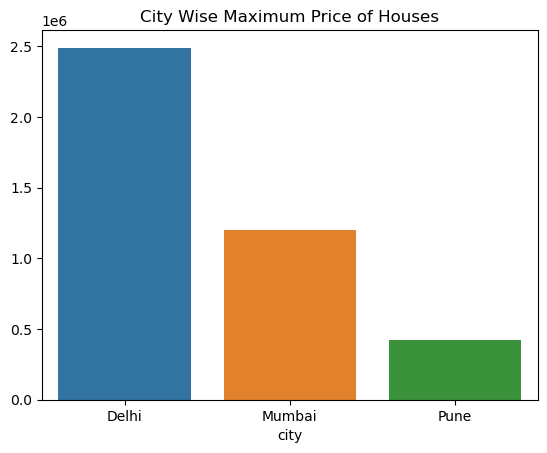

In [1487]:
display(df_copy.groupby('city')['price'].max())
print()
plt.title("City Wise Maximum Price of Houses")
sns.barplot(x = df_copy.groupby('city')['price'].max().index , y = df_copy.groupby('city')['price'].max().values)
plt.show()

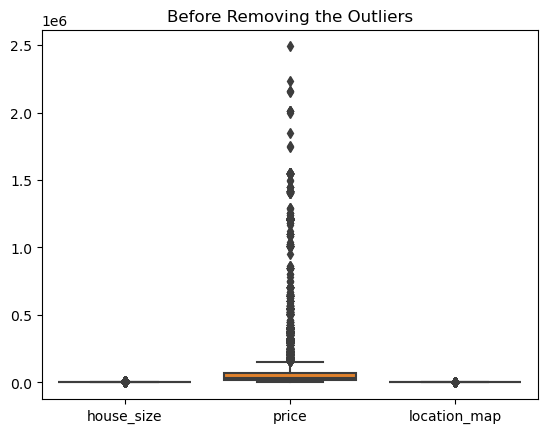

In [1401]:
plt.title("Before Removing the Outliers")
sns.boxplot(df_copy)
plt.show()

In [1402]:
s = set()
for i in df_copy[['house_size','price','location_map']]:
    q1 = df_copy[i].quantile(0.25)
    q3 = df_copy[i].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    temp = df_copy[(df_copy[i] <= lower_bound) | (df_copy[i] >= upper_bound)].index
    s.update(set(temp))
    
df_copy = df_copy.drop(s)    

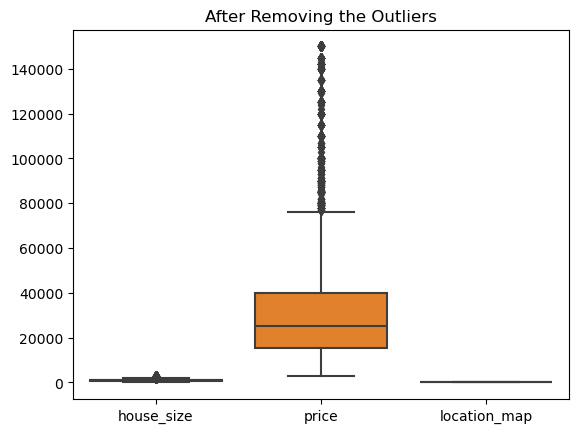

In [1403]:
plt.title("After Removing the Outliers")
sns.boxplot(df_copy)
plt.show()

### Spliting the Dependent & Independent Feature

In [1488]:
X= df_copy.drop('price',axis = 1)
y = df_copy['price']

### Applying the Train_Test_Split

In [1489]:
from sklearn.model_selection import train_test_split

In [1490]:
x_train , x_test , y_train , y_test = train_test_split(X, y, random_state = 100 , test_size = 0.25)

In [1491]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9181, 5), (3061, 5), (9181,), (3061,))

### OneHotEncoding:  
Let's Apply the OneHotEncoding on Categorical Data

In [1492]:
from sklearn.preprocessing import OneHotEncoder

In [1493]:
ohe = OneHotEncoder()
ohe

OneHotEncoder()

In [1519]:
ohe.get_feature_names_out()

array(['house_type_1 Bhk Apartment', 'house_type_1 Bhk Independent Floor',
       'house_type_1 Bhk Independent House',
       'house_type_1 Rk Studio Apartment', 'house_type_2 Bhk Apartment',
       'house_type_2 Bhk Independent Floor',
       'house_type_2 Bhk Independent House', 'house_type_3 Bhk Apartment',
       'house_type_3 Bhk Independent House', 'house_type_3 Bhk Villa',
       'house_type_4 Bhk Apartment', 'house_type_4 Bhk Independent Floor',
       'house_type_4 Bhk Independent House', 'house_type_4 Bhk Villa',
       'house_type_5 Bhk Independent Floor',
       'house_type_5 Bhk Independent House', 'house_type_5 Bhk Villa',
       'city_Delhi', 'city_Mumbai', 'city_Pune', 'Status_Furnished',
       'Status_Semi-Furnished', 'Status_Unfurnished'], dtype=object)

In [1494]:
def columns_transform(x_train_ , x_test_):
    encoded_df = pd.DataFrame(ohe.fit_transform(x_train_[['house_type','city','Status']]).toarray(),
                              columns = ohe.get_feature_names_out() , index = x_train_.index)
    x_train_ = x_train_.drop(['house_type','city','Status'], axis = 1).join(encoded_df)

    encoded_test = pd.DataFrame(ohe.transform(x_test_[['house_type','city','Status']]).toarray(),
                               columns = ohe.get_feature_names_out(), index = x_test_.index)
    x_test_ = x_test_.drop(['house_type','city','Status'], axis = 1).join(encoded_test)

    return x_train_ , x_test_

In [1495]:
x_train , x_test  = columns_transform(x_train , x_test)
x_test.head()

,house_size,location_map,house_type_1 Bhk Apartment,house_type_1 Bhk Independent Floor,house_type_1 Bhk Independent House,house_type_1 Rk Studio Apartment,house_type_2 Bhk Apartment,house_type_2 Bhk Independent Floor,house_type_2 Bhk Independent House,house_type_3 Bhk Apartment,...,house_type_4 Bhk Villa,house_type_5 Bhk Independent Floor,house_type_5 Bhk Independent House,house_type_5 Bhk Villa,city_Delhi,city_Mumbai,city_Pune,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished
10189,1046,157,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
11541,1010,743,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6134,1200,108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11415,910,743,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5606,850,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


###### Svae the Pickle File

In [1496]:
import pickle
f = open("Feature Scaling File/One_Hot.pkl","wb")
pickle.dump(ohe, f)
f.close()

We Had Convert All the category columns in the numberical by using OneHotEncoding also we save it into binary file

### Feature Scaling :
Now we are going to perform the the feature transformaion using StandardScaler or MinMaxScaler Technique

### MinMaxScaler

In [1413]:
from sklearn.preprocessing import MinMaxScaler

In [1497]:
mms = MinMaxScaler()
mms

MinMaxScaler()

In [1498]:
x_train[['house_size','location_map']] = mms.fit_transform(x_train[['house_size','location_map']])
x_test[['house_size','location_map']] = mms.transform(x_test[['house_size','location_map']])

In [1499]:
f= open("Feature Scaling File/MinMax_Scaler.pkl", "wb")
pickle.dump(mms, f)
f.close()

We also applied the Feature Transformation on Numerical Columns as well. we applied on house_size , location_map because house_size in the form of sqft and location_map we mapped to transform the multiple location so for better model accuracy. we applied the MinMaxScaler Trasformation on That.

### Model Creation

###### Let's find the best model to find the best accuracy

In [1500]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [1501]:
lr = LinearRegression()
lso = Lasso()
rid = Ridge()
enc = ElasticNet()

Here We have loaded the model the to find the best accuracy model.Now let's import the metrics to find the accuracy of the model

### GridSearchCV:
This GridSeachCV is hyperperameter tunning model where we can get the best perameter of our model

In [1502]:
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

In [1504]:
from sklearn.model_selection import GridSearchCV

In [1505]:
gsv_lasso = GridSearchCV(lso, param_grid = param_grid , cv = 5)
gsv_ridge = GridSearchCV(rid, param_grid = param_grid , cv = 5)
gsv_enc = GridSearchCV(enc , param_grid = param_grid , cv = 5)

In [1506]:
gsv_lasso.fit(x_train , y_train)
gsv_ridge.fit(x_train, y_train)
gsv_enc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]})

### Let's See the Best Permeter of the Model

In [1507]:
# Best parameters and scores
print("Lasso Best Params:", gsv_lasso.best_params_)
print("Lasso Best Score:", gsv_lasso.best_score_)
print("Ridge Best Params:", gsv_ridge.best_params_)
print("Ridge Best Score:", gsv_ridge.best_score_)
print("ElasticNet Best Params:", gsv_enc.best_params_)
print("ElasticNet Best Score:", gsv_enc.best_score_)

Lasso Best Params: {'alpha': 10.0}
Lasso Best Score: 0.6834341707263142
Ridge Best Params: {'alpha': 1.0}
Ridge Best Score: 0.683495276076448
ElasticNet Best Params: {'alpha': 0.1}
ElasticNet Best Score: 0.5323168901155582


### Ridge:
Ridge is best Model for us for go furthur with that

### CrossValScore:
The CrossValScore will let's us know what is the average accuracy with respect to different different model

In [1508]:
from sklearn.model_selection import cross_val_score

In [1509]:
cvs = cross_val_score(gsv_ridge,x_train , y_train , cv = 5)

In [1510]:
cvs

array([0.65915778, 0.67831964, 0.6837469 , 0.67550004, 0.72075201])

Now we can say we got **Highest** accuracy as **72%** and **Lowest** is **65%** with respect to our model

### Predict:
Now we'll predict the test_data using the Ridge Regression

In [1511]:
y_pred_test = gsv_ridge.predict(x_test)
pd.DataFrame({"Y_pred_Test":y_test, "Y_pred_test":y_pred_test}).head()

,Y_pred_Test,Y_pred_test
10189,42000,30992.663296
11541,16500,1914.796424
6134,80000,61235.210100
11415,11000,-4310.461655
5606,80000,45113.558918


### ModelAccuracy :
Now We'll check the model_accuracy with respect to r2_score and different-different cost function

In [1512]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1513]:
mse = mean_squared_error(y_test , y_pred_test)
mae = mean_absolute_error(y_test , y_pred_test)
rmse = np.sqrt(mse)
score = r2_score(y_test , y_pred_test)

print(f"My Mean Square Error is : {mse}")
print(f"My Mean Absolute Error is : {mae}")
print(f"My Root Mean Square Error is : {rmse}")
print(f"My Test Accuracy  is : {score}")

My Mean Square Error is : 11632143515.744377
My Mean Absolute Error is : 43555.96529614579
My Root Mean Square Error is : 107852.41543769141
My Test Accuracy  is : 0.6977263815926331


### Appling Ridge CV:
We are aging fitting the RidgeCV model because through GridSeachCV It'as unable to predict the output in python script file

In [1525]:
from sklearn.linear_model import RidgeCV

In [1537]:
rc = RidgeCV(alphas=(1.0,100) , cv = 5)

In [1538]:
rc.fit(x_train, y_train)

RidgeCV(alphas=(1.0, 100), cv=5)

In [1548]:
rc_y_pred_test =rc.predict(x_test)

In [1549]:
mse = mean_squared_error(y_test , rc_y_pred_test)
mae = mean_absolute_error(y_test , rc_y_pred_test)
rmse = np.sqrt(mse)
score = r2_score(y_test , rc_y_pred_test)

print(f"My Mean Square Error is : {mse}")
print(f"My Mean Absolute Error is : {mae}")
print(f"My Root Mean Square Error is : {rmse}")
print(f"My Test Accuracy  is : {score}")

My Mean Square Error is : 11632143515.744377
My Mean Absolute Error is : 43555.96529614579
My Root Mean Square Error is : 107852.41543769141
My Test Accuracy  is : 0.6977263815926331


In [1550]:
f = open("Model_File/Model.pkl", "wb")
pickle.dump(rc,f)
f.close()

In [1551]:
f = open("Model_File/Model.pkl", "rb")
pickle.load(f)

RidgeCV(alphas=(1.0, 100), cv=5)

### We Found Our Test Accuracy as 69% which is Preety Average

In [1576]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.26.4
2.1.4
1.2.2
